In [1]:
import numpy
import pygal
import math

In [2]:
def y_sol(x):
    return x/2 + (8/3)*(x*math.exp(2*x-2))
    
def f(x, y):
    return -x + (y*(2*x+1)) / x

y_0 = 3
x_0 = 1
x_end = 18.2
h = 0.1

## Euler`s Method

In [4]:
xs_e = [x_0,]
ys_e = [y_0,]

while xs_e[-1] < x_end:
    ys_e.append(ys_e[-1] + h * f(xs_e[-1], ys_e[-1]))
    xs_e.append(xs_e[-1] + h)

## Imrpoved Euler`s Method

In [3]:
xs_ie = [x_0,]
ys_ie = [y_0,]

while xs_ie[-1] < x_end:
    ys_ie.append(ys_ie[-1] + h * f(xs_ie[-1] + h/2, ys_ie[-1] + (h/2)*f(xs_ie[-1], ys_ie[-1])))
    xs_ie.append(xs_ie[-1] + h)

## Runge–Kutta Method

In [6]:
xs_rk = [x_0,]
ys_rk = [y_0,]

while xs_rk[-1] < x_end:
    k1 = f(xs_rk[-1], xs_rk[-1])
    k2 = f(xs_rk[-1] + h/2, ys_rk[-1] + h*k1/2)
    k3 = f(xs_rk[-1] + h/2, ys_rk[-1] + h*k2/2)
    k4 = f(xs_rk[-1] + h, ys_rk[-1] + h*k3)
    xs_rk.append(xs_rk[-1] + h)

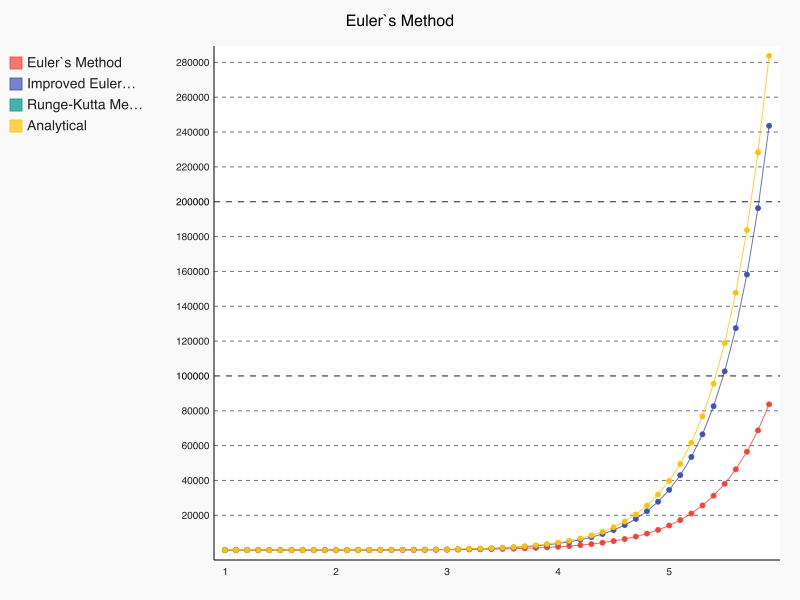

In [9]:
offset = 50

xy_chart = pygal.XY()
xy_chart.title = 'Euler`s Method'
xy_chart.add('Euler`s Method', [(x, y) for x, y in zip(xs_e, ys_e)][:offset])
xy_chart.add('Improved Euler`s Method', [(x, y) for x, y in zip(xs_ie, ys_ie)][:offset])
xy_chart.add('Runge-Kutta Method', [(x, y) for x, y in zip(xs_rk, ys_rk)][:offset])
xy_chart.add('Analytical', [(x, y_sol(x)) for x in xs_e][:offset])